Interprétabilité locale sur des images

In [6]:
# Import des librairies
# Base
%matplotlib inline
import numpy as np # type: ignore
import pandas as pd # type: ignore
import time,os
import cv2# type: ignore
# Data Viz
import matplotlib.pyplot as plt# type: ignore
# Modèle
import tensorflow as tf# type: ignore
from keras import models, losses, metrics,utils,Model# type: ignore
print("tensorflow version",tf.__version__)
import mlflow

tensorflow version 2.16.1


In [9]:
logged_model = r'\\wsl.localhost\Ubuntu\home\adrien\MLflow\mlruns\902956440979823799\965c82771e144a14a8ed9875930dd581\artifacts\model'
# Load model as a PyFuncModel.
cnn = mlflow.pyfunc.load_model(logged_model)


2024/09/09 11:15:06 WARNING mlflow.utils.requirements_utils: Detected one or more mismatches between the model's dependencies and the current Python environment:
 - mlflow (current: 2.16.0, required: mlflow==2.14.3)
To fix the mismatches, call `mlflow.pyfunc.get_model_dependencies(model_uri)` to fetch the model's environment and install dependencies using the resulting environment file.


2024/09/09 11:15:06 WARNING mlflow.pyfunc: The version of Python that the model was saved in, `Python 3.12.2`, differs from the version of Python that is currently running, `Python 3.11.9`, and may be incompatible
d:\Adrien et Sarah\Documents\GitHub\JAN24_PLANT_RECOGNITION\.venv\Lib\site-packages\keras\src\saving\saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 40 variables whereas the saved optimizer has 78 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [10]:
def my_preprocessing_func(img):
    image = np.array(img)
    return image / 255

In [11]:
labels=pd.read_csv("../references/labels.csv",header=0,index_col=0)
labels.head()

0
0       Apple__Apple_scab
1        Apple__Black_rot
2  Apple_Cedar_apple_rust
3           Apple_healthy
4       Blueberry_healthy

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 831ms/step


C:\Users\artho\AppData\Local\Temp\ipykernel_60072\3724202950.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.title("actual: %s\npred: %s" % (label, labels.iloc[predicted_class_indices[0]][0]), fontsize=12)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

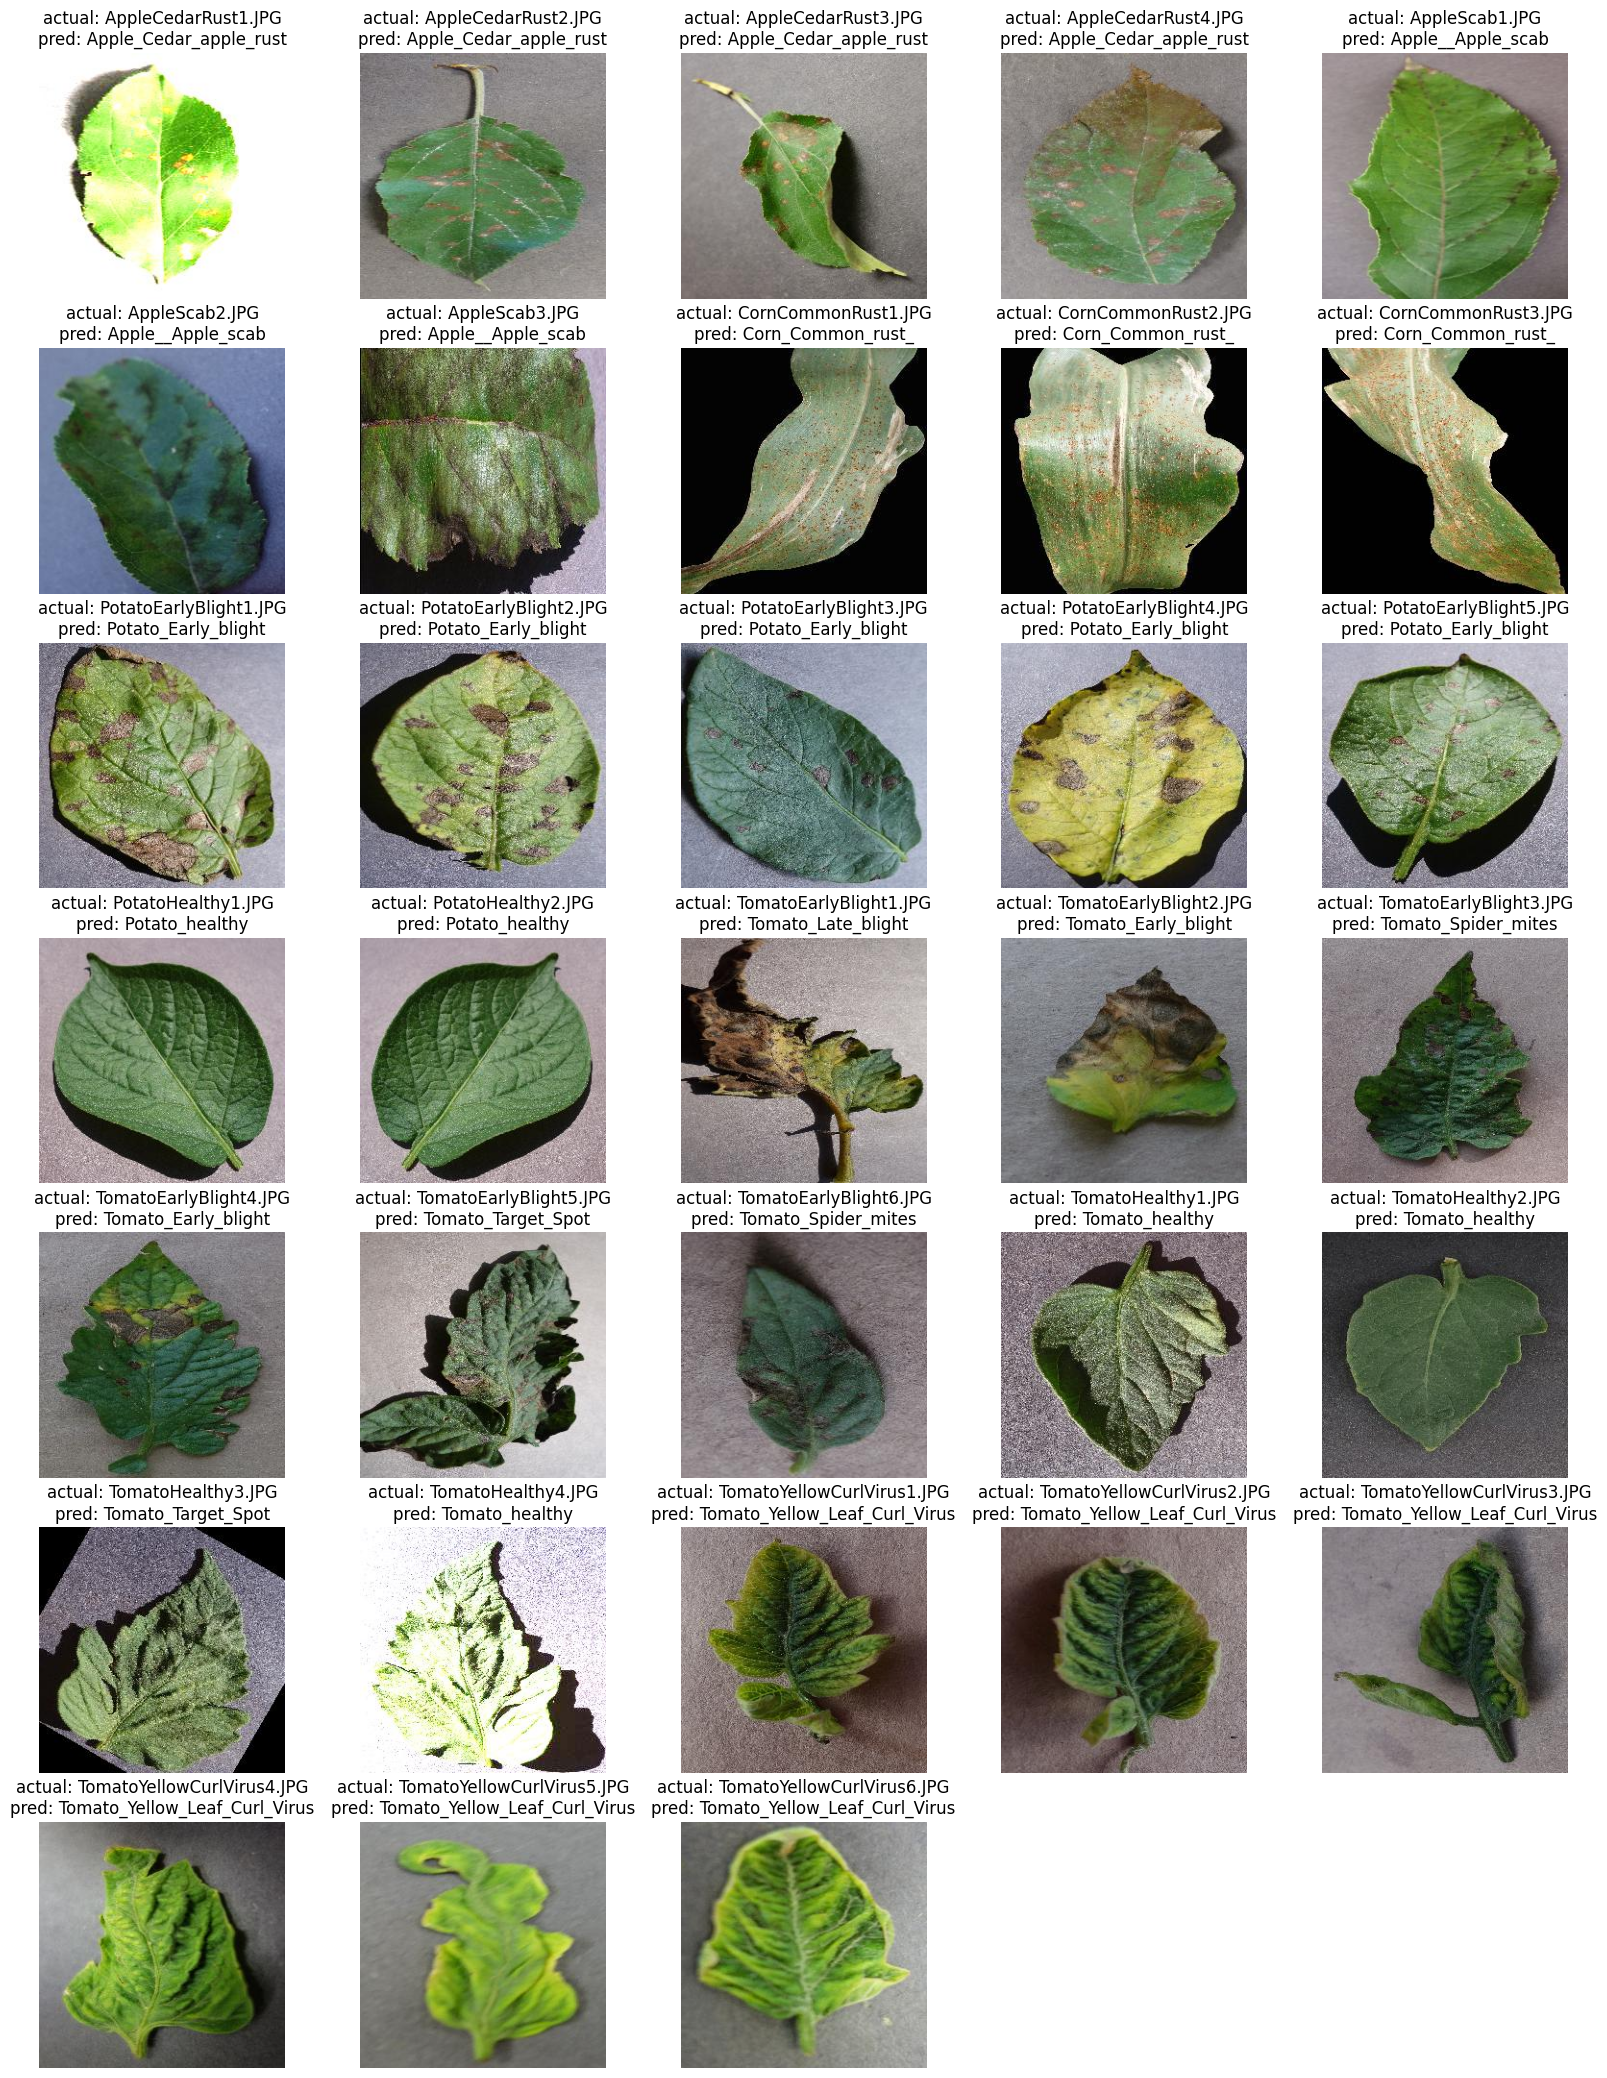

In [12]:
basepath='../src/features/test/'
list_of_labels = os.listdir(basepath)
figure=plt.figure(figsize = (20,30))
for idx,label in enumerate(list_of_labels):
    current_label_dir_path = os.path.join(basepath, label)
    img=cv2.cvtColor(cv2.imread(current_label_dir_path),cv2.COLOR_BGR2RGB)
    plt.subplot(8, 5, idx+1)
    plt.imshow(img)
    plt.axis('off')
    img=my_preprocessing_func(img)
    img=img.reshape(1,256,256,3)
    pred = cnn.predict(img)
    predicted_class_indices=np.argmax(pred,axis=1)
    plt.title("actual: %s\npred: %s" % (label, labels.iloc[predicted_class_indices[0]][0]), fontsize=12)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step

C:\Users\artho\AppData\Local\Temp\ipykernel_60072\383797228.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.title("actual: %s\np: %s" % (label, labels.iloc[predicted_class_indices[0]][0]), fontsize=11)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


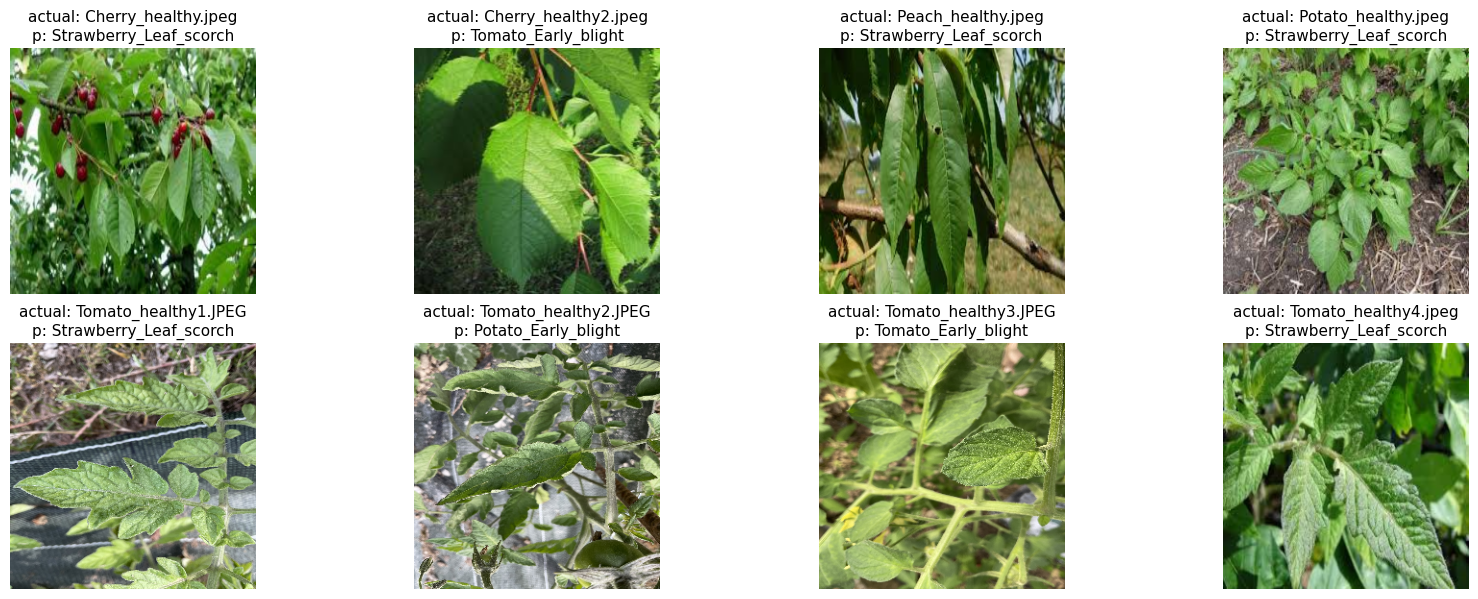

In [13]:
basepath='../src/features/jardinperso/'
list_of_labels = os.listdir(basepath)
figure=plt.figure(figsize = (20,30))
for idx,label in enumerate(list_of_labels):
    current_label_dir_path = os.path.join(basepath, label)
    img=cv2.cvtColor(cv2.imread(current_label_dir_path),cv2.COLOR_BGR2RGB)
    img=cv2.resize(img,(256,256))
    plt.subplot(8, 4, idx+1)
    plt.imshow(img)
    plt.axis('off')
    img=my_preprocessing_func(img)
    img=img.reshape(1,256,256,3)
    pred = cnn.predict(img)
    predicted_class_indices=np.argmax(pred,axis=1)
    plt.title("actual: %s\np: %s" % (label, labels.iloc[predicted_class_indices[0]][0]), fontsize=11)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step

C:\Users\artho\AppData\Local\Temp\ipykernel_60072\2839444859.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.title("actual: %s\np: %s" % (label, labels.iloc[predicted_class_indices[0]][0]), fontsize=11)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


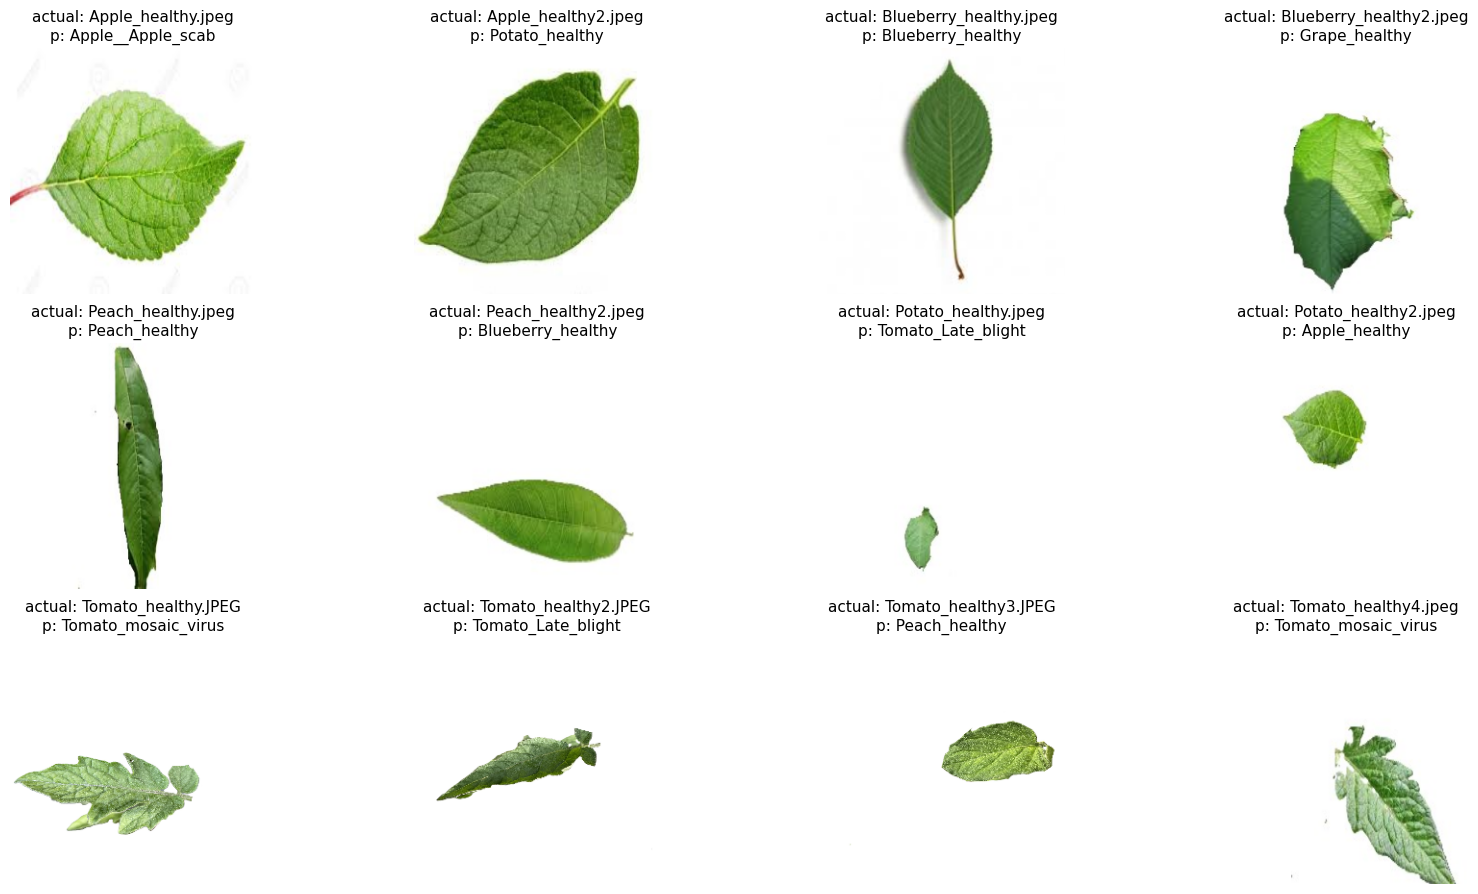

In [14]:
basepath='../src/features/jardinpersofiltre/'
list_of_labels = os.listdir(basepath)
figure=plt.figure(figsize = (20,30))
for idx,label in enumerate(list_of_labels):
    current_label_dir_path = os.path.join(basepath, label)
    img=cv2.cvtColor(cv2.imread(current_label_dir_path),cv2.COLOR_BGR2RGB)
    img=cv2.resize(img,(256,256))
    plt.subplot(8, 4, idx+1)
    plt.imshow(img)
    plt.axis('off')
    img=my_preprocessing_func(img)
    img=img.reshape(1,256,256,3)
    pred = cnn.predict(img)
    predicted_class_indices=np.argmax(pred,axis=1)
    plt.title("actual: %s\np: %s" % (label, labels.iloc[predicted_class_indices[0]][0]), fontsize=11)
